# Proiect AED, Grupa 8, Set de date Facebook metrics

### Realizat de Dogaru Corina, Fulga Paula si Gavrila Alina

## Cuprins 

1) [Analiza Exploratorie](#1.-Analiza-Exploratorie)

2) [Corelatii](#2.-Corelatii)

3) [Variabile](#3.-Variabile)

4) [Regresii](#4.-Regresii)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
import warnings
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#citim setul de date cu care vom lucra
df = pd.read_csv(r"C:\Users\userr\OneDrive\Desktop\set_date.csv",delimiter=';', skiprows=0, low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

# 1. Analiza Exploratorie

In [3]:
df.shape #setul de date prezinta 500 inregistrari cu 19 de variabile

(500, 19)

In [4]:
df.head(5) # ne uitam la primele 5 inregistrari din setul de date

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [5]:
df.isnull().any() #verificam daca avem o valoare nula in setul de date

Page total likes                                                       False
Type                                                                   False
Category                                                               False
Post Month                                                             False
Post Weekday                                                           False
Post Hour                                                              False
Paid                                                                    True
Lifetime Post Total Reach                                              False
Lifetime Post Total Impressions                                        False
Lifetime Engaged Users                                                 False
Lifetime Post Consumers                                                False
Lifetime Post Consumptions                                             False
Lifetime Post Impressions by people who have liked your Page           False

Exista valori de 0 in coloanele "Paid", "Like", "Share".

In [6]:
df.describe() # descrierea setului de date

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [7]:
df.min() #MINIM

Page total likes                                                       81370
Type                                                                    Link
Category                                                                   1
Post Month                                                                 1
Post Weekday                                                               1
Post Hour                                                                  1
Paid                                                                     0.0
Lifetime Post Total Reach                                                238
Lifetime Post Total Impressions                                          570
Lifetime Engaged Users                                                     9
Lifetime Post Consumers                                                    9
Lifetime Post Consumptions                                                 9
Lifetime Post Impressions by people who have liked your Page             567

In [8]:
df.max() #MAXIM

Page total likes                                                        139441
Type                                                                     Video
Category                                                                     3
Post Month                                                                  12
Post Weekday                                                                 7
Post Hour                                                                   23
Paid                                                                       1.0
Lifetime Post Total Reach                                               180480
Lifetime Post Total Impressions                                        1110282
Lifetime Engaged Users                                                   11452
Lifetime Post Consumers                                                  11328
Lifetime Post Consumptions                                               19779
Lifetime Post Impressions by people who have liked y

In [9]:
df.mean() #MEDIE

Page total likes                                                       123194.176000
Category                                                                    1.880000
Post Month                                                                  7.038000
Post Weekday                                                                4.150000
Post Hour                                                                   7.840000
Paid                                                                        0.278557
Lifetime Post Total Reach                                               13903.360000
Lifetime Post Total Impressions                                         29585.948000
Lifetime Engaged Users                                                    920.344000
Lifetime Post Consumers                                                   798.772000
Lifetime Post Consumptions                                               1415.130000
Lifetime Post Impressions by people who have liked your Page     

In [10]:
df.median() #MEDIANA

Page total likes                                                       129600.0
Category                                                                    2.0
Post Month                                                                  7.0
Post Weekday                                                                4.0
Post Hour                                                                   9.0
Paid                                                                        0.0
Lifetime Post Total Reach                                                5281.0
Lifetime Post Total Impressions                                          9051.0
Lifetime Engaged Users                                                    625.5
Lifetime Post Consumers                                                   551.5
Lifetime Post Consumptions                                                851.0
Lifetime Post Impressions by people who have liked your Page             6255.5
Lifetime Post reach by people who like y

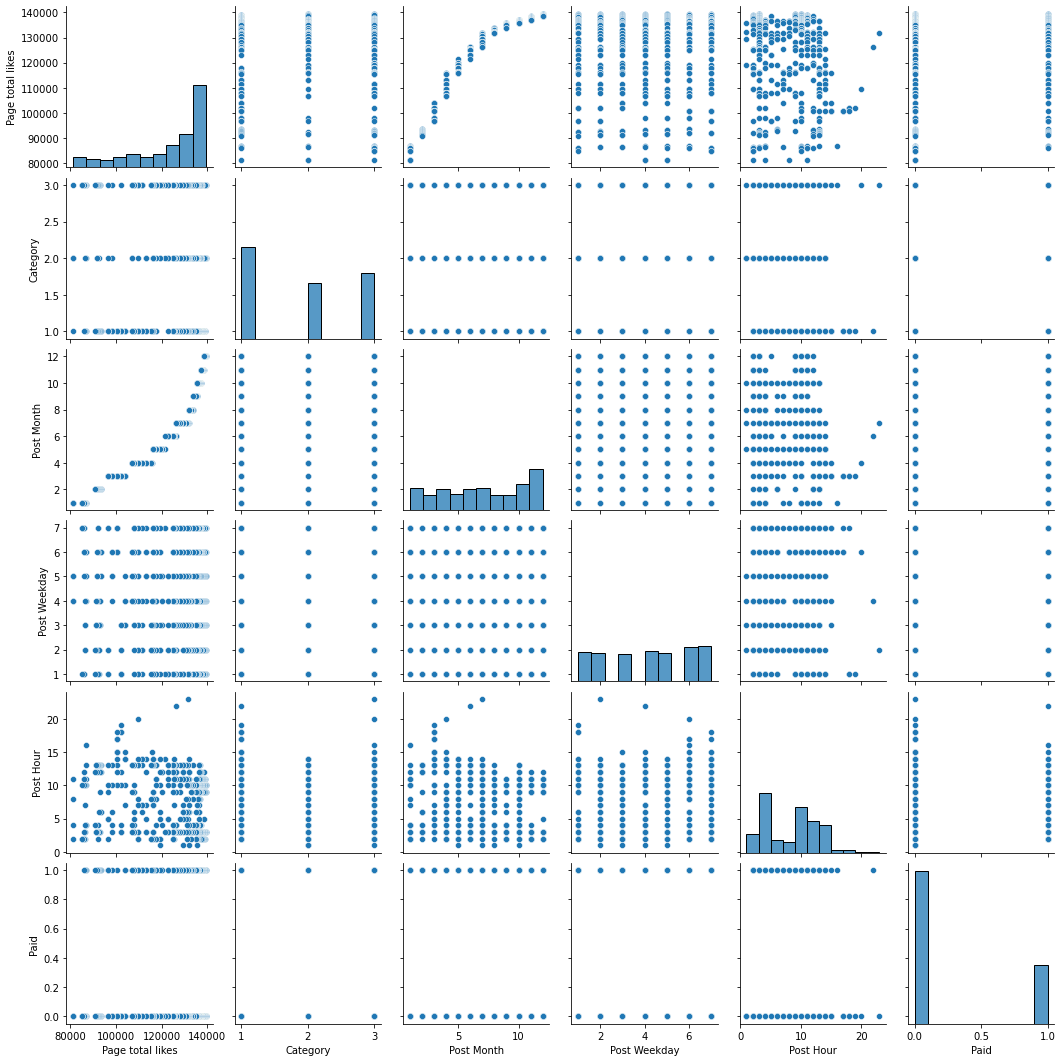

In [11]:
plotdf = df.drop(df.columns[7:19],axis =1)
sns.pairplot(data=plotdf)

<AxesSubplot:xlabel='Paid', ylabel='count'>

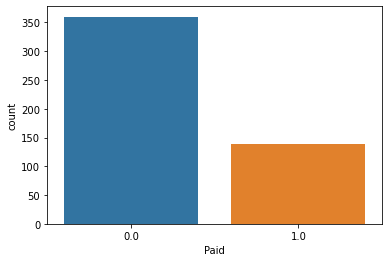

In [12]:
sns.countplot(x = 'Paid', data=df) #postarile platite (promovare platita) de brand-ul de cosmetice 

Din grafic se poate observa ca au fost aproximativ 150 de platite in 2014, iar restul postarilor sunt neplatite.

<AxesSubplot:xlabel='Post Hour', ylabel='count'>

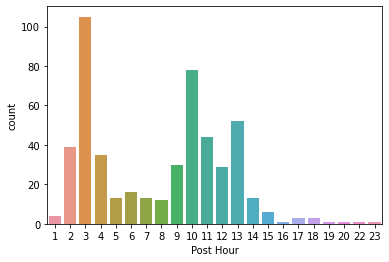

In [13]:
sns.countplot(x = 'Post Hour', data=df) #ora de postare 

Cele mai multe postari au fost incarcate pe Facebook la ora 3 a.m. Intre orele 16-23 se observa o activita scazuta in postari ale brandului de cosmetice.

<AxesSubplot:xlabel='Post Weekday', ylabel='count'>

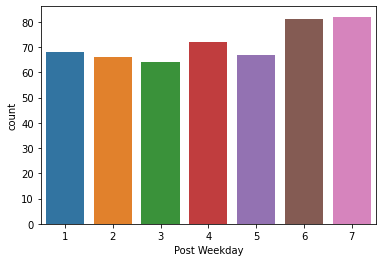

In [14]:
sns.countplot(x = 'Post Weekday', data=df) #zilele de postare

Chiar daca observam ca numarul postarilor este relativ constant intre 65 si 80, in zilele de weekend exista o usoara crestere, ajungand pana la valorile maxime de 80.

<AxesSubplot:xlabel='Post Month', ylabel='count'>

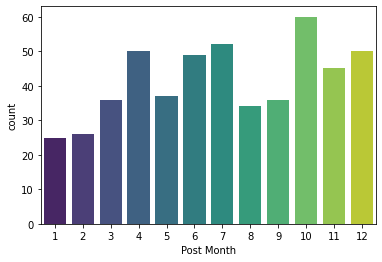

In [15]:
sns.countplot(x = 'Post Month', data=df, palette='viridis') #lunile de postare 

In ceea ce priveste lunile, cele mai multe postari s-au realizat in octombrie, insa putem observa valori crescute si in iulie si aprilie. Luna cu cele mai putine postari este ianuarie, cu valori in jur de 25.

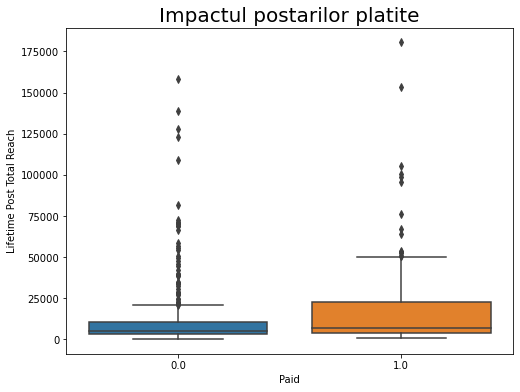

In [16]:
Postari_platite=["Paid"]
for i in Postari_platite:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=i,y="Lifetime Post Total Reach",data=df)
    plt.title("Impactul postarilor platite",fontsize=20)
    plt.show()

Din cate se poate observa, postarile promovate ( platite) sunt vazute de mai multi utilizatori.

D:\AN_2\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributia de Like-uri la Postari')

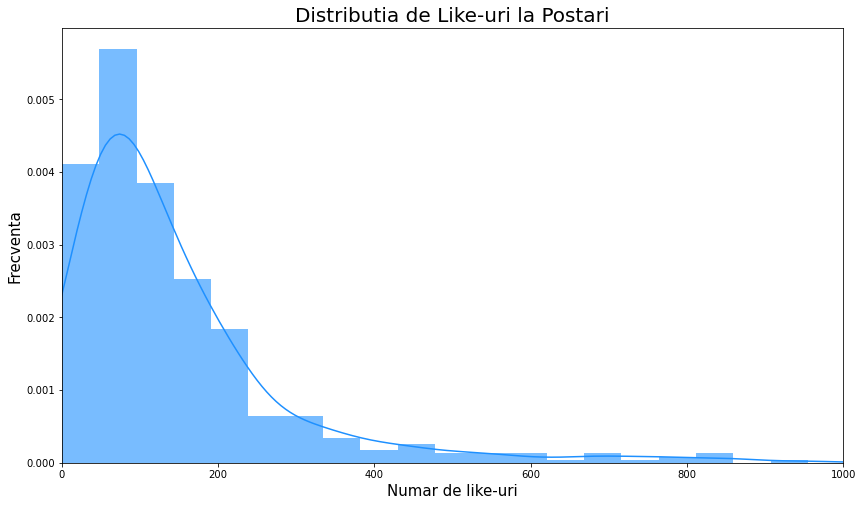

In [17]:
plt.figure(figsize=(14,8))
sns.distplot(df[df["like"]<1000]["like"],bins=20,color="dodgerblue",hist_kws={"alpha":0.6})
plt.xlim(0,1000)
plt.xlabel("Numar de like-uri",fontsize=15)
plt.ylabel("Frecventa",fontsize=15)
plt.title("Distributia de Like-uri la Postari",fontsize=20)

# 2. Corelatii 

<AxesSubplot:>

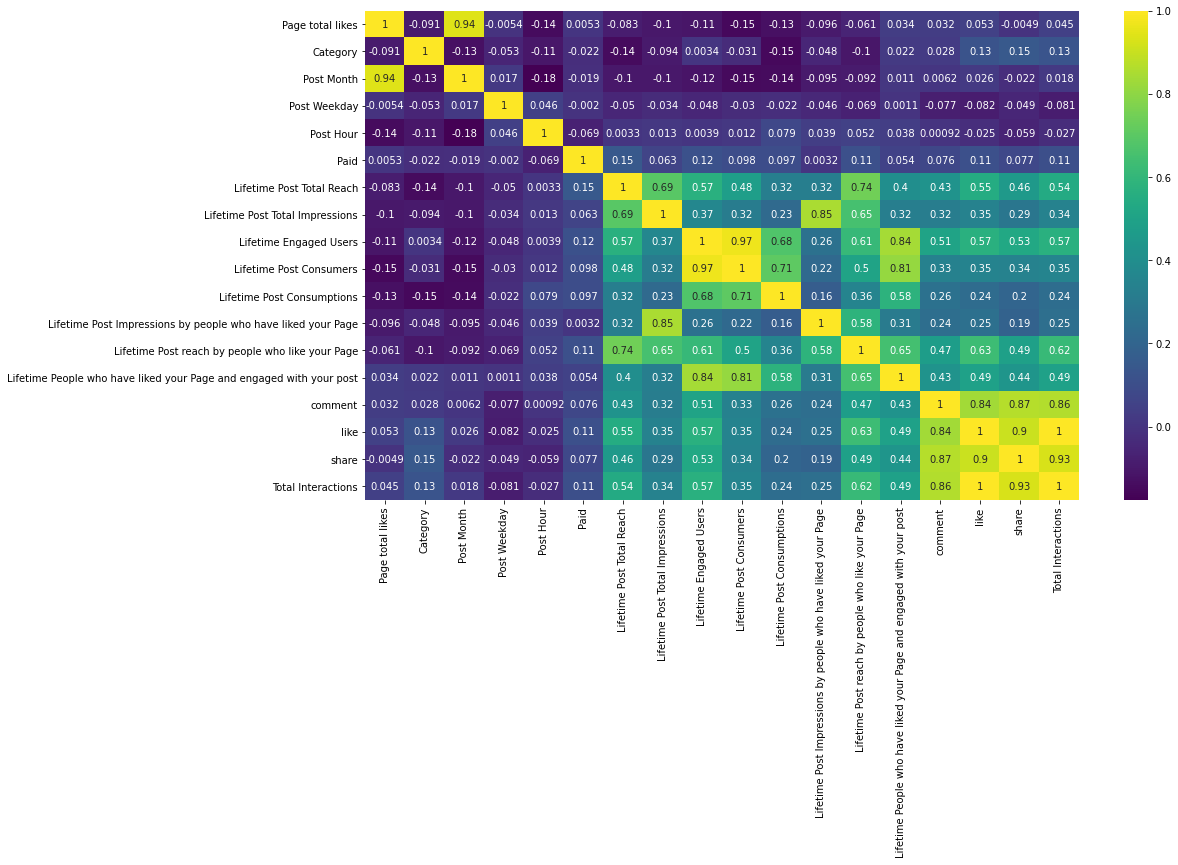

In [18]:
plt.figure(figsize = (16, 9))
sns.heatmap(df.corr(), cmap="viridis",annot=True) #corelatie heatmap in functie de toate coloanele

###### Observam ca cele mai mari corelatii sunt intre : Lifetime Post Consumers-Lifetime engaged users ,Page Total Likes-Post Month, Share-Total Interactions, Share-Like, Share-Comment, Like-Comment, De asemenea, se pot oberva si alte corelatii cu valori intre 0.5 si 0.9.

In [19]:
#Media like-urilor in functie de tipul postarii

agregari = df.groupby("Type").agg(
                                    medie = ("like", "mean"),
                                    )
agregari

,medie
Type,
Link,73.318182
Photo,182.611765
Status,176.711111
Video,231.428571


Din media like-urilor, se observa ca postarile sub forma de video au strans cele mai multe like-uri. In schimb, link-urile au cele mai putine, cu o medie de aproximativ 73.

In [20]:
#Maximul comentariilor pe tipuri de postari

agregari_2 = df.groupby("Type").agg(
                                    maxim = ("comment", "max"),
                                    )
agregari_2

,maxim
Type,
Link,15
Photo,372
Status,60
Video,23


Cele mai multe comentarii au fost scrise la postarile de tip poza.

In [21]:
#Maximul share-urilor pe tipuri de postari

agregari_3 = df.groupby("Type").agg(
                                    maxim = ("share", "max"),
                                    )
agregari_3

,maxim
Type,
Link,44.0
Photo,790.0
Status,123.0
Video,121.0


Cele mai multe distribuiri au fost inregistrate la fotografii.

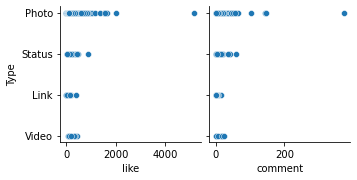

In [22]:
sns.pairplot(df, x_vars=["like", "comment"], y_vars="Type", kind="scatter")
plt.show()

Distributia like-urilor si comentariilor in functie de tipul postarii.

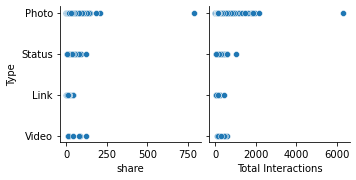

In [23]:
sns.pairplot(df, x_vars=["share", "Total Interactions"], y_vars="Type", kind="scatter")
plt.show()

Distributia share-urilor si interactiunilor in functie de tipul postarii.

In [24]:
Pivot = pd.pivot_table(df,aggfunc="median",
                           columns="Post Hour",
                           index="Post Weekday",
                           values="like")
Pivot = Pivot[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23]]
Pivot

Post Hour,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,22,23
Post Weekday,,,,,,,,,,,,,,,,,,,,,
1,NaN,55.0,79.0,82.5,98.0,160.5,NaN,NaN,78.0,124.0,...,148.0,1045.5,NaN,NaN,NaN,70.5,2.0,NaN,NaN,NaN
2,64.0,48.0,107.0,545.5,57.5,152.0,87.0,105.5,143.0,282.5,...,135.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0
3,167.0,121.5,71.0,25.0,2639.5,154.0,66.0,79.5,31.0,114.0,...,114.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,319.0,190.0,140.0,139.0,372.5,305.0,227.0,NaN,38.5,154.0,...,166.0,176.0,179.0,NaN,NaN,NaN,NaN,NaN,102.0,NaN
5,36.0,99.0,142.0,84.0,93.0,49.0,129.0,53.0,97.0,89.0,...,74.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,68.5,92.0,117.0,226.0,79.0,NaN,64.0,53.5,144.5,...,61.0,239.5,55.0,65.0,107.5,NaN,NaN,235.0,NaN,NaN
7,NaN,138.0,162.0,104.0,33.0,39.0,3.0,1.0,194.0,69.5,...,135.0,79.0,2.5,NaN,213.0,6.0,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Mediana pe like-uri in functie de zilele saptamanii si orele de postare')

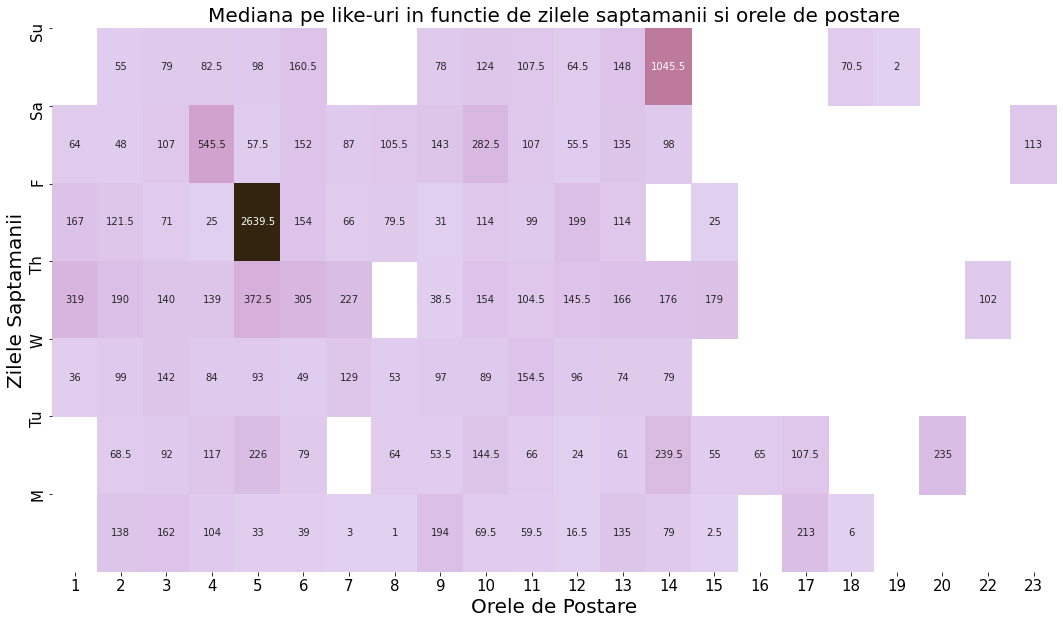

In [25]:
plt.figure(figsize=(18,10))
cmap= sns.cubehelix_palette(8, start=1.5, rot=-.50,as_cmap=True)
sns.heatmap(Pivot,cbar=False,cmap=cmap,annot=True, fmt='g')

plt.yticks(np.arange(7),["Su","Sa","F","Th","W","Tu","M"],fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Zilele Saptamanii",fontsize=20)
plt.xlabel("Orele de Postare",fontsize=20)
plt.title("Mediana pe like-uri in functie de zilele saptamanii si orele de postare",fontsize=20)

# 3. Variabile

###### In ceea ce priveste variabilele categoriale, in setul de date avem coloana "Type" , de tipul object, care contine 4 
###### categori "Link", "Status", "Photo", "Video".

In [26]:
pd.get_dummies(df)

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,2,12,4,3,0.0,2752,5091,178,109,...,1640,119,4,79.0,17.0,100,0,1,0,0
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,...,6112,1108,5,130.0,29.0,164,0,0,1,0
2,139441,3,12,3,3,0.0,2413,4373,177,113,...,1503,132,0,66.0,14.0,80,0,1,0,0
3,139441,2,12,2,10,1.0,50128,87991,2211,790,...,32048,1386,58,1572.0,147.0,1777,0,1,0,0
4,139441,2,12,2,3,0.0,7244,13594,671,410,...,3200,396,19,325.0,49.0,393,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,3,1,7,2,0.0,4684,7536,733,708,...,2876,392,5,53.0,26.0,84,0,1,0,0
496,81370,2,1,5,8,0.0,3480,6229,537,508,...,2104,301,0,53.0,22.0,75,0,1,0,0
497,81370,1,1,5,2,0.0,3778,7216,625,572,...,2388,363,4,93.0,18.0,115,0,1,0,0
498,81370,3,1,4,11,0.0,4156,7564,626,574,...,2452,370,7,91.0,38.0,136,0,1,0,0


Am transformat variabila categoriala in variabile dummy si au rezultat coloanele "Type_Link" "Type_Photo" "Type_Status" si "Type_Video" cu valori binare.

###### Din punct de vedere al variabilelor independente, coloana "Type" este una dintre cele mai importante deoarece ne-a 
###### ajutat la corelatii si la variabilele dummy. 
###### De asemenea, coloanele "Like", "Comment", "Share" si "Total Interactions" sunt variabile independente importante in 
###### setul de date fiindca se coreleaza cu restul variabilelor si sunt relevante in analiza datelor statistice ale brandului de cosmetice.

# 4. Regresii

### 4.1  Regresie Liniara Simpla

#### Putem prezice interactiunile totale ale paginii in functie de numarul total de utilizatori care au interactionat cu postarile?

In [27]:
x=df["Lifetime Engaged Users"].values.reshape(-1,1)
y=df["Total Interactions"]


model = LinearRegression().fit(x,y)

r_patrat = model.score(x, y)

print ("r patrat=",r_patrat)

print ("Constanta=", model.intercept_)
print("b0=", model.coef_)

r patrat= 0.3273664605435397
Constanta= 8.849829086918476
b0= [0.22086325]


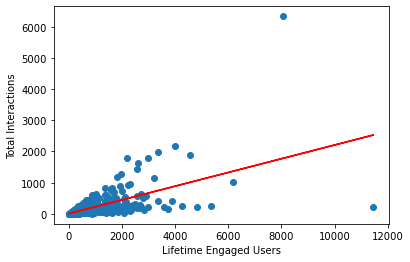

In [28]:
plt.xlabel("Lifetime Engaged Users")
plt.ylabel("Total Interactions")
plt.scatter(x, y)
plt.plot(x, 8.84 + 0.22 * x, 'r')
plt.show()

Putem observa ca acest grafic prezinta un tren ascendent in ceea ce priveste numarul de interactiuni in functie de implicarea utilizatorilor. 

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print(x_train)
print (y_train)

[[  199]
 [  524]
 [  111]
 [ 2624]
 [ 1362]
 [  356]
 [11452]
 [  631]
 [   17]
 [  545]
 [  303]
 [  722]
 [  669]
 [ 1407]
 [  369]
 [ 1666]
 [  504]
 [  355]
 [  212]
 [ 4544]
 [  232]
 [ 2664]
 [  322]
 [  642]
 [  338]
 [ 5352]
 [ 3216]
 [  365]
 [ 2827]
 [  393]
 [  791]
 [ 1150]
 [  975]
 [  345]
 [ 2733]
 [  513]
 [ 3742]
 [  360]
 [  757]
 [  830]
 [ 1117]
 [  230]
 [  840]
 [  625]
 [  165]
 [  550]
 [  572]
 [  398]
 [  780]
 [  671]
 [  607]
 [ 1954]
 [  452]
 [ 1141]
 [  724]
 [ 1359]
 [  701]
 [  630]
 [ 1706]
 [ 1049]
 [  177]
 [  421]
 [  541]
 [ 1521]
 [  541]
 [  491]
 [  868]
 [ 1383]
 [  699]
 [  200]
 [ 1418]
 [  330]
 [  529]
 [  282]
 [  519]
 [ 3984]
 [ 1476]
 [  565]
 [  251]
 [  703]
 [ 2579]
 [  536]
 [  357]
 [  705]
 [ 2417]
 [  392]
 [ 1029]
 [  131]
 [  252]
 [ 1480]
 [  579]
 [  895]
 [ 2298]
 [  552]
 [  979]
 [  949]
 [  624]
 [ 1374]
 [ 1215]
 [ 1779]
 [  273]
 [  423]
 [ 2552]
 [  603]
 [  121]
 [ 1635]
 [  199]
 [ 1151]
 [   24]
 [  518]
 [  356]
 

In [30]:
lm = LinearRegression()
model1 = lm.fit(x_train, y_train)

print("alfa=constanta = ", model1.intercept_)
print("lista coef beta=", model1.coef_)

alfa=constanta =  -10.745751809033067
lista coef beta= [0.25528898]



Total Interactions = -10.745751809033067 + 0.25528898 * Lifetime Engaged Users

In [31]:
y_prezis = model1.predict(x_test)

print("Mean absolute error:", metrics.mean_absolute_error(y_test,y_prezis))
print("Mean squared error: ", metrics.mean_squared_error(y_test,y_prezis))
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,y_prezis)))
r1_patrat = model1.score(x_train, y_train)
print("r patrat", r1_patrat)

Mean absolute error: 124.33566323045554
Mean squared error:  39815.0985247432
Root mean squared error:  199.5372108774281
r patrat 0.3581362930080464


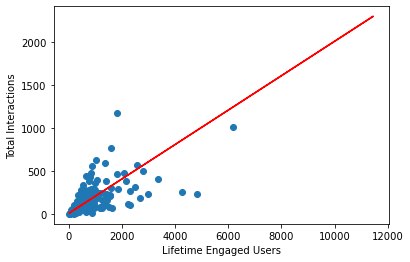

In [32]:
plt.xlabel("Lifetime Engaged Users")
plt.ylabel("Total Interactions")
plt.scatter(x_test, y_test)
plt.plot(x_train, 5.98 + 0.20 * x_train, 'r')
plt.show()

Trendul este ascendent si in ceea ce priveste valorile de test.

### 4.2.Regresie liniara multipla

#### Putem prezice numarul total de persoane care apreciaza pagina si care interactioneaza cu postarile in functie de numarul total de like-uri si numarul total de utilizatori captivati de postari?

In [33]:
predictori = ["Page total likes", "Lifetime Engaged Users"]
x1=df[predictori]
y1=df["Lifetime People who have liked your Page and engaged with your post"]


model = LinearRegression().fit(x1,y1)

r_patrat = model.score(x1, y1)

print ("r patrat",r_patrat)

print ("Constanta=", model.intercept_)
print("b0=", model.coef_)

r patrat 0.7208851913033816
Constanta= -478.3355285926699
b0= [0.00486676 0.53106839]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=0.7, test_size=0.3, random_state=10)

print(x_train)
print (y_train)

     Page total likes  Lifetime Engaged Users
84             137177                     199
388            109670                     524
149            135713                     111
101            137020                    2624
451             93470                    1362
..                ...                     ...
320            123047                     759
15             138414                    1264
484             86491                    1062
125            136393                     236
265            128032                     528

[350 rows x 2 columns]
84      156
388     382
149      93
101    1354
451     497
       ... 
320     408
15     1162
484     437
125     196
265     328
Name: Lifetime People who have liked your Page and engaged with your post, Length: 350, dtype: int64


In [35]:
lm = LinearRegression()
model2 = lm.fit(x_train, y_train)

print("alfa=constanta = ", model2.intercept_)
print("lista coef beta=", model2.coef_)

alfa=constanta =  -305.2630296645551
lista coef beta= [0.00387405 0.46094792]


In [36]:
y_prezis = model2.predict(x_test)
print(y_prezis)

[ 440.36830428  429.12085556  564.36329371  413.58961857  623.23329463
  485.75230149  540.13807762  362.26647389  400.21547291 1216.72736404
  626.62263113  592.02016868  342.00418926  560.41028355  444.0454814
  735.37545549  292.49066555  275.43559265  597.81833027  366.83940563
  419.76557893  717.85943468  744.26379036  624.24540556  410.41120161
  318.08577418  400.12031165  429.37333571 1069.65124869  398.97478839
  448.2923658  1398.36193853  264.78196585   60.23013814  242.61460678
 1050.50037806  848.04178319 1058.41087045  664.97270849  523.00075033
 1213.37091805  360.21903216  394.64587129  517.31447751  849.09111741
  358.00267381  360.30329776  394.17026223  344.3598054   298.5219524
  640.48748128  433.20423906  328.85372618  597.7626451   815.79100941
  241.51437609  614.86097492  482.46764398  418.94407191  371.96263635
  358.31253371  692.65518459  436.70624878  425.78382416  487.68297253
  528.45813293   60.23013814  428.12773401  669.7511486   664.93304877
  808.51

In [37]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_prezis))
print("Mean squared error: ", metrics.mean_squared_error(y_test,y_prezis))
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,y_prezis)))
r2_patrat = model2.score(x_train, y_train)
print("r patrat", r2_patrat)

Mean absolute error:  181.07839202187378
Mean squared error:  105320.76812940575
Root mean squared error:  324.5316134514568
r patrat 0.6643979012775845


In [38]:
v_actual_vs_v_prezis = pd.DataFrame({" Valori Actuale: ":y_test,"Valori Prezise":y_prezis})
v_actual_vs_v_prezis

,Valori Actuale:,Valori Prezise
151,354,440.368304
424,628,429.120856
154,537,564.363294
190,300,413.589619
131,774,623.233295
...,...,...
12,152,323.901561
97,240,372.292059
130,176,318.546722
472,466,443.171952


    Din cate se observa, valorile reale sunt relativ apropiate de valorile prezise in urma regresiei liniare multiple, ceea ce inseamna ca numarul total de persoane care apreciaza pagina si care interactioneaza cu postarile poate fi apreciat in acest fel.